In [ ]:
!wget 'https://raw.githubusercontent.com/karencfisher/dcgan/main/dcgan.py'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.keras.datasets import cifar10
import tensorflow as tf

from dcgan import DCGAN

Load the fashion-mnist data set and preprocess images (scale and flatten)

In [2]:
# load cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5

Look at a sample of the original images

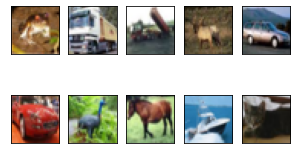

In [3]:
fig, ax = plt.subplots(2, 5, figsize=(5, 3))
fig.patch.set_facecolor('white')
for indx, img in enumerate(X_train[:10]):
    i, j = indx // 5, indx % 5
    img = img * 127.5 + 127.5
    img = img.astype(int)
    ax[i, j].imshow(img, cmap=plt.cm.binary)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

Instantiate and train our DCGAN

In [4]:
model_path = None
dcgan = DCGAN(model_path=model_path, channels=3)

d_losses, g_losses = dcgan.train(X_train, 25, 100, verbose=1)

In [ ]:
dcgan.save_model('models')

Plot the losses during training. The generator and discriminator losses should converge.

In [ ]:
plt.plot(range(1, 26), d_losses, label='disc. loss')
plt.plot(range(1, 26), g_losses, label='gen. loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()